In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math

In [148]:
alternating_parental_gene_crossover = pd.read_csv("alternating_parental_gene_crossover.csv")
alternating_parental_gene_crossover_scramble_mutation = pd.read_csv("alternating_parental_gene_crossover_scramble_mutation.csv")
double_segment_crossover = pd.read_csv("double_segment_crossover.csv")
double_segment_crossover_scramble_mutation = pd.read_csv("double_segment_crossover_scramble_mutation.csv")
partially_mapped_crossover = pd.read_csv("partially_mapped_crossover.csv")
partially_mapped_crossover_scramble_mutation = pd.read_csv("partially_mapped_crossover_scramble_mutation.csv")
single_segment_crossover = pd.read_csv("single_segment_crossover.csv")
single_segment_crossover_scramble_mutation = pd.read_csv("single_segment_crossover_scramble_mutation.csv")

In [149]:
def custom_normalize(series, min_value, max_value):
    return 1 - (series - min_value) / (max_value - min_value)

def custom_normalize_and_modify(df, min_value, max_value):
    normalized_df = df.copy()
    normalized_df['iterations_best_fitness_normalized'] = 1 - (df['iterations_best_fitness'] - min_value) / (max_value - min_value)
    normalized_df.loc[(df['iterations_gen'] == 0) & (df['iterations_best_fitness'] != min_value), 'iterations_gen'] = 0
    return normalized_df


dataframes = {
    "Alternating Swap": alternating_parental_gene_crossover,
    "Alternating Scramble": alternating_parental_gene_crossover_scramble_mutation,
    "Double Segment Swap": double_segment_crossover,
    "Double Segment Scramble": double_segment_crossover_scramble_mutation,
    "Partially Mapped Swap": partially_mapped_crossover,
    "Partially Mapped Scramble": partially_mapped_crossover_scramble_mutation,
    "Single Segment Swap": single_segment_crossover,
    "Single Segment Scramble": single_segment_crossover_scramble_mutation
}

normalized_dataframes_with_modification = {}
for key, df in dataframes.items():
    normalized_df = custom_normalize_and_modify(df, 120, 134)
    normalized_dataframes_with_modification[key] = normalized_df


In [150]:
def compute_statistics(df):
    return {
        "Mean Fitness": df['iterations_best_fitness_normalized'].mean(),
        "Std Fitness": df['iterations_best_fitness_normalized'].std(),
        "Min Fitness": df['iterations_best_fitness_normalized'].min(),
        "Max Fitness": df['iterations_best_fitness_normalized'].max(),
        "Median Fitness": df['iterations_best_fitness_normalized'].median(),
        "Mean Generation": df['iterations_gen'].mean(),
        "Std Generation": df['iterations_gen'].std(),
        "Min Generation": df['iterations_gen'].min(),
        "Max Generation": df['iterations_gen'].max(),
        "Median Generation": df['iterations_gen'].median(),

    }

stats = {}
for key, df in normalized_dataframes_with_modification.items():
    stats[key] = compute_statistics(df)

stats_df = pd.DataFrame(stats).T
stats_df

,Mean Fitness,Std Fitness,Min Fitness,Max Fitness,Median Fitness,Mean Generation,Std Generation,Min Generation,Max Generation,Median Generation
Alternating Swap,0.629286,0.256576,0.000000,1.0,0.714286,142.12,161.484732,0.0,486.0,73.0
Alternating Scramble,0.601429,0.257275,0.000000,1.0,0.714286,130.44,152.963013,0.0,466.0,55.5
Double Segment Swap,0.629286,0.256576,0.000000,1.0,0.714286,142.12,161.484732,0.0,486.0,73.0
Double Segment Scramble,0.550000,0.366684,-1.000000,1.0,0.714286,129.35,153.007518,0.0,497.0,38.5
Partially Mapped Swap,0.748571,0.195939,0.000000,1.0,0.714286,66.20,115.477052,0.0,424.0,4.5
Partially Mapped Scramble,0.728571,0.216558,-0.428571,1.0,0.714286,65.24,110.442555,0.0,493.0,3.0
Single Segment Swap,0.795714,0.162762,0.000000,1.0,0.714286,34.80,88.163989,0.0,493.0,4.0
Single Segment Scramble,0.818571,0.164776,0.285714,1.0,0.714286,32.19,78.960122,0.0,453.0,5.0


In [151]:
fitness_data = [df['iterations_best_fitness_normalized'].values for df in normalized_dataframes_with_modification.values()]
gen_data = [df['iterations_gen'].values for df in normalized_dataframes_with_modification.values()]


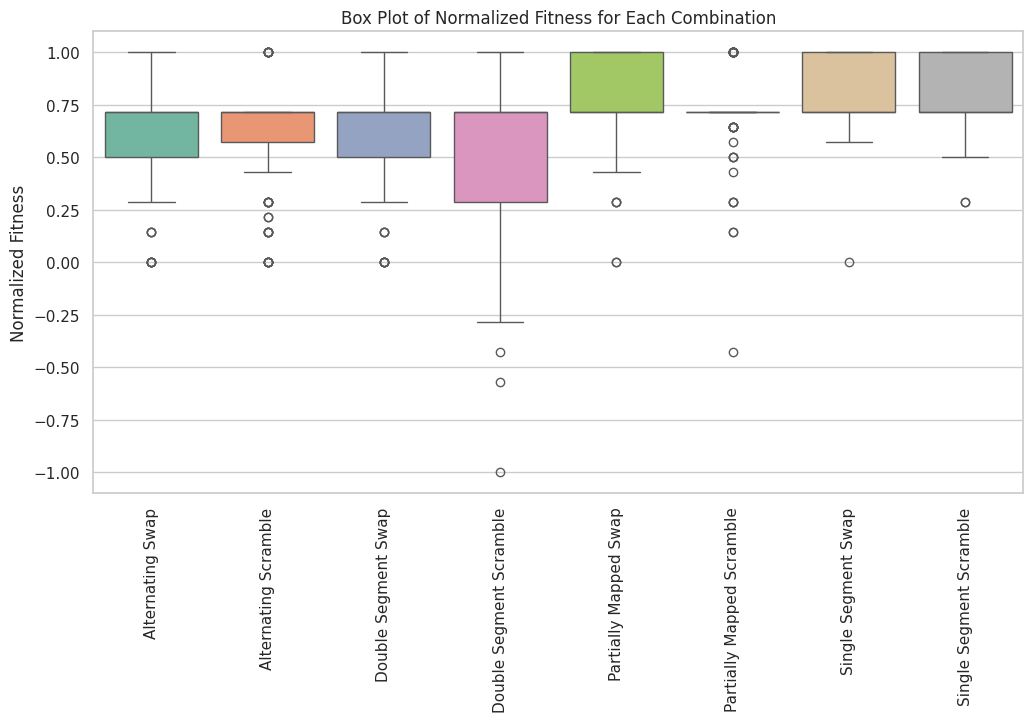

In [152]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=fitness_data, palette="Set2")
plt.xticks(ticks=range(len(normalized_dataframes_with_modification)), labels=normalized_dataframes_with_modification.keys(), rotation=90)
plt.ylabel('Normalized Fitness')
plt.title('Box Plot of Normalized Fitness for Each Combination')
plt.show()

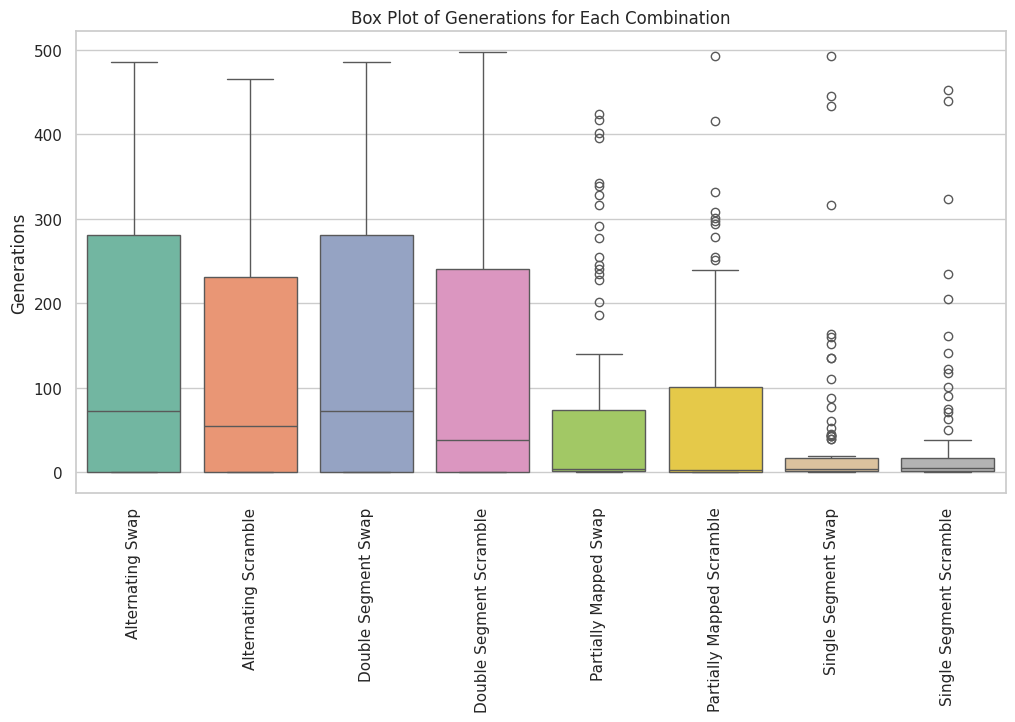

In [153]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=gen_data, palette="Set2")
plt.xticks(ticks=range(len(normalized_dataframes_with_modification)), labels=normalized_dataframes_with_modification.keys(), rotation=90)
plt.ylabel('Generations')
plt.title('Box Plot of Generations for Each Combination')
plt.show()

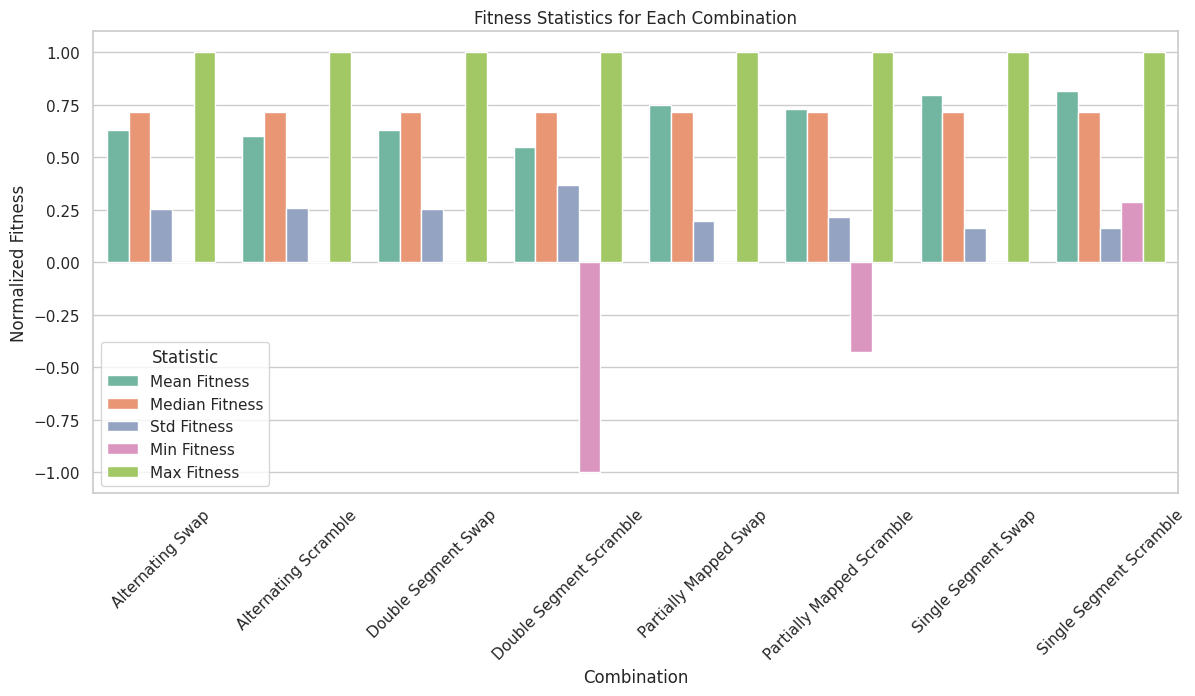

In [154]:

fitness_stats_melted = stats_df[["Mean Fitness", "Median Fitness", "Std Fitness", "Min Fitness", "Max Fitness"]].reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')
gen_stats_melted = stats_df[["Mean Generation", "Median Generation", "Std Generation", "Min Generation", "Max Generation"]].reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

plt.figure(figsize=(14, 6))
sns.barplot(x='index', y='Value', hue='Statistic', data=fitness_stats_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title('Fitness Statistics for Each Combination')
plt.ylabel('Normalized Fitness')
plt.xlabel('Combination')
plt.legend(title='Statistic')
plt.show()

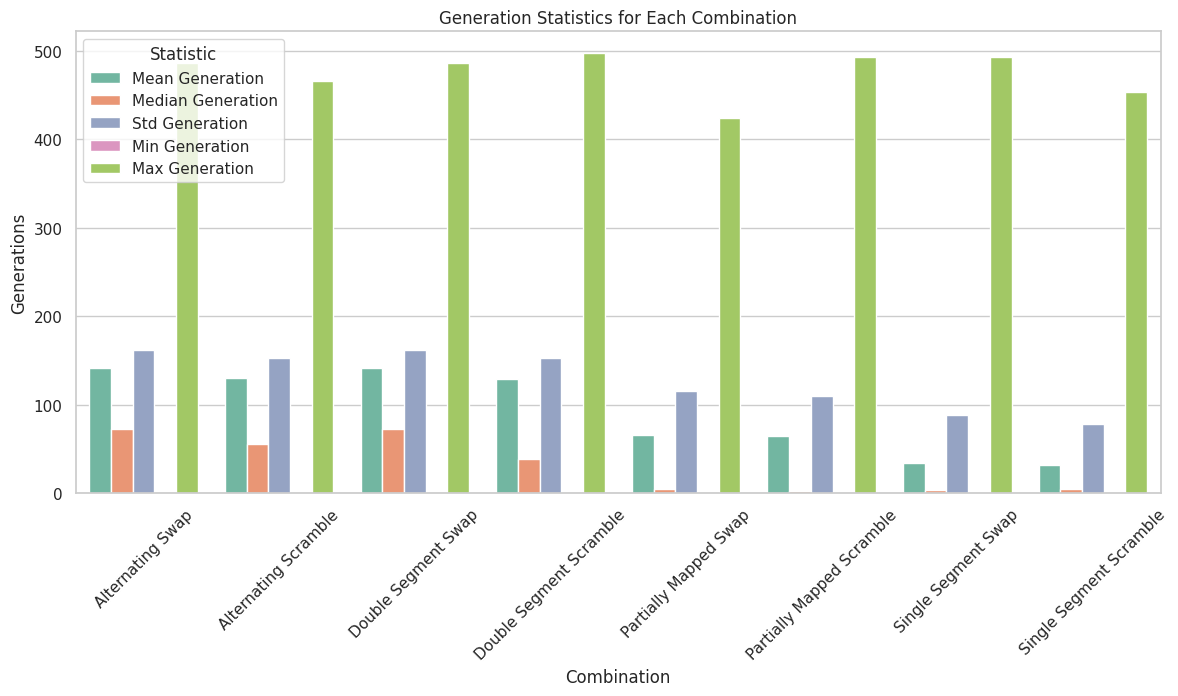

In [155]:
plt.figure(figsize=(14, 6))
sns.barplot(x='index', y='Value', hue='Statistic', data=gen_stats_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title('Generation Statistics for Each Combination')
plt.ylabel('Generations')
plt.xlabel('Combination')
plt.legend(title='Statistic')
plt.show()

In [156]:
# Define a function to find the 95th percentile generation for the best fitness
def compute_95_percentile_generation(df, global_best_fitness_upper=1, global_best_fitness_lower=1):
    # Filter the rows where the best fitness is equal to the global best fitness
    filtered_df = df[(df['iterations_best_fitness_normalized'] >= global_best_fitness_upper) & (df['iterations_best_fitness_normalized'] <= global_best_fitness_lower)]
    # Compute the 95th percentile of the generation column
    percentile_95 = filtered_df['iterations_gen'].quantile(0.95)
    return percentile_95

# Compute the 95th percentile generation for each dataframe
percentiles_95 = {}
for key, df in normalized_dataframes_with_modification.items():
    percentiles_95[key] = math.ceil(compute_95_percentile_generation(df))

# Convert the 95th percentiles to a dataframe for better readability
percentiles_95_df = pd.DataFrame.from_dict(percentiles_95, orient='index', columns=['95th Percentile Generation'])

# Display the 95th percentile generations dataframe
percentiles_95_df

,95th Percentile Generation
Alternating Swap,413
Alternating Scramble,415
Double Segment Swap,413
Double Segment Scramble,464
Partially Mapped Swap,361
Partially Mapped Scramble,308
Single Segment Swap,157
Single Segment Scramble,205


In [157]:

# Define a function to calculate the probability of reaching the best fitness value
def compute_probability_of_best_fitness(df,global_best_fitness_upper=1, global_best_fitness_lower=1):
    total_runs = len(df)
    successful_runs = len(df[(df['iterations_best_fitness_normalized'] == global_best_fitness_upper) & (df['iterations_best_fitness_normalized'] <= global_best_fitness_lower)])
    probability = successful_runs / total_runs
    return probability

# Compute the probability for each dataframe
probabilities = {}
for key, df in normalized_dataframes_with_modification.items():
    probabilities[key] = compute_probability_of_best_fitness(df)

probabilities_df = pd.DataFrame.from_dict(probabilities, orient='index', columns=['Probability of Best Fitness'])

probabilities_df

,Probability of Best Fitness
Alternating Swap,0.14
Alternating Scramble,0.08
Double Segment Swap,0.14
Double Segment Scramble,0.13
Partially Mapped Swap,0.26
Partially Mapped Scramble,0.23
Single Segment Swap,0.33
Single Segment Scramble,0.41


In [158]:
def compute_generations_for_95_percent(probability, generations_95_percent):
    if probability == 0:
        return float('inf')
    generations_needed = math.ceil((1 / probability) * generations_95_percent)
    return generations_needed

generations_for_95_percent = {}
for key in probabilities.keys():
    generations_for_95_percent[key] = compute_generations_for_95_percent(probabilities[key], percentiles_95[key])

generations_for_95_percent_df = pd.DataFrame.from_dict(generations_for_95_percent, orient='index', columns=['Generations for 95% Probability'])

generations_for_95_percent_df

,Generations for 95% Probability
Alternating Swap,2950
Alternating Scramble,5188
Double Segment Swap,2950
Double Segment Scramble,3570
Partially Mapped Swap,1389
Partially Mapped Scramble,1340
Single Segment Swap,476
Single Segment Scramble,500


<ipython-input-159-1888132675ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


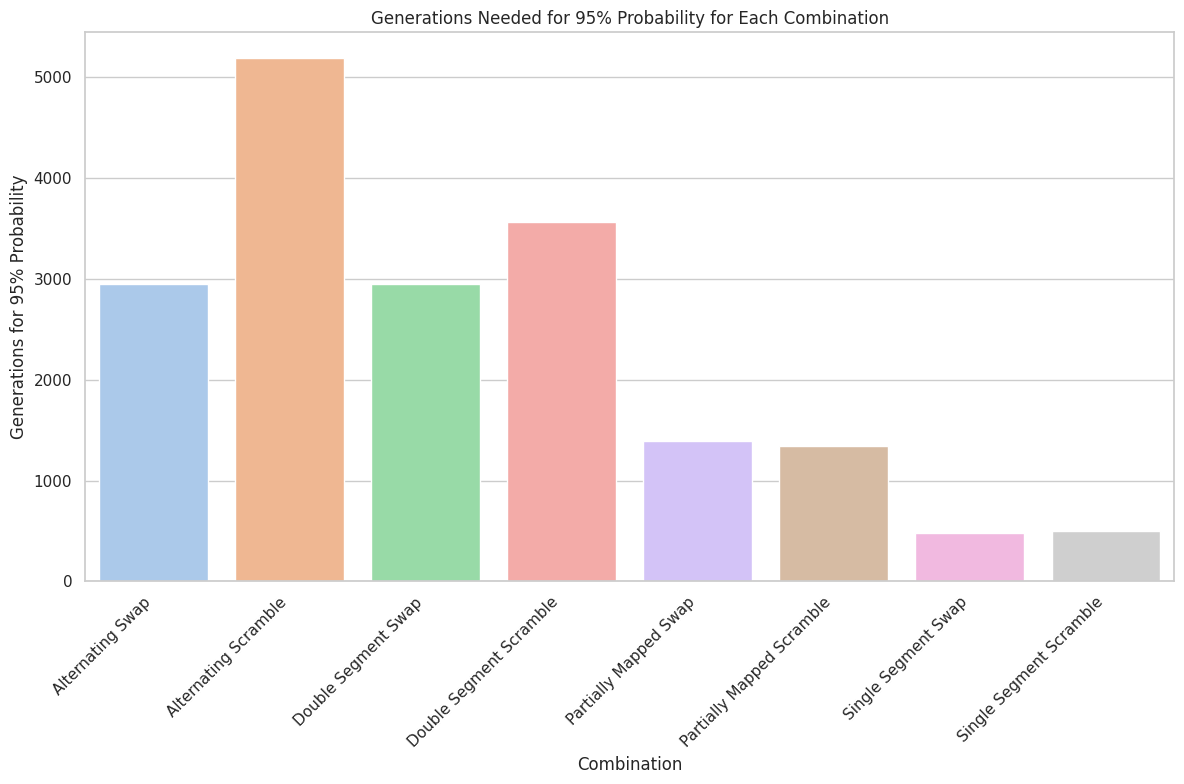

In [159]:
sns.set(style="whitegrid")

# Draw bar chart with seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x=generations_for_95_percent_df.index,
    y='Generations for 95% Probability',
    data=generations_for_95_percent_df,
    palette='pastel'
)
bar_plot.set_title('Generations Needed for 95% Probability for Each Combination')
bar_plot.set_xlabel('Combination')
bar_plot.set_ylabel('Generations for 95% Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()